<a href="https://colab.research.google.com/github/jdsmithwes/Telco-Data-Churn/blob/master/Module3_project_master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Telco Churn Project
Jamaal Smith 





## Business Case Intro

This analysis will seek to examine whether or not one can predict a customer's decision to remain with a phone company or leave the company. This analysis is important to businesses that must allocate resources to maximize their revenue. Additionally, besides losing paying customers in the near term, companies often have to spend more money to attract new customers than they spend retaining existing customers. 

While there are many factors and data points that can be collected on customers, the primary goal of this analysis is to identify the handful of feature variables that a company can monitor to take preventive measures to mitigate customer churn.

### Additional Context (From Context)

Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers.

Telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services, often use customer attrition analysis and customer attrition rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. Companies from these sectors often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.

Companies usually make a distinction between voluntary churn and involuntary churn. Voluntary churn occurs due to a decision by the customer to switch to another company or service provider, involuntary churn occurs due to circumstances such as a customer's relocation to a long-term care facility, death, or the relocation to a distant location. In most applications, involuntary reasons for churn are excluded from the analytical models. Analysts tend to concentrate on voluntary churn, because it typically occurs due to factors of the company-customer relationship which companies control, such as how billing interactions are handled or how after-sales help is provided.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from xgboost import plot_tree
from xgboost import plot_importance

## Data Analysis

### First Impressions of Data

In [2]:
#import the data
df = pd.read_csv('churn_data.csv')
from scrubbing import info
#from scrubbing import null
info(df)

The dataframe has a shape of:

 (3333, 21)
The dataframe has the following datatypes:

 state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object
The total number of each datatype is:


 int64      8
float64    8
object     4
bool       1
dtype: int64


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Based on initial review of the data, we can conclude that the dataset is comprised of 21 columns and 3333 rows. Further, there are no null values in the data set.

The next step in preparing the data for the model is to convert the object type in the phone number, international plan, and voicemail plan columns for the machine learning model.

For now, I will only focus on the international and voicemail plan columns. I made this decision because the phone number a person is assigned plays no role in whether or not a person keeps their service.

### Phone Number & State Column Treatment

### EDA

Text(0.5, 1.0, 'Frequency of Churn')

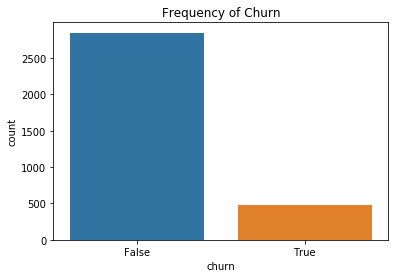

In [4]:
#Frequency of Churn Phenomenon
sns.countplot(x='churn',data=df)
plt.title('Frequency of Churn')

In [5]:
a = (df['churn'].sum())
b = (len(df['churn']))
percent_churn = a/b
percent_remain = 1-percent_churn

print('The percentage of Churn in dataset is:', percent_churn*100)
print('The percentage of remaining in dataset is:', percent_remain*100)

The percentage of Churn in dataset is: 14.491449144914492
The percentage of remaining in dataset is: 85.5085508550855


#### Feature Variable Examination

Because the churn variable is categorical, many visual tools will be limited and not fruitful. As a proxy, comparisons of feature variables against the account length column might be useful. It is worth examining whether certain behaviors by customers result in longer account lengths.

In [6]:
#for visualization below
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

<Figure size 1008x288 with 0 Axes>

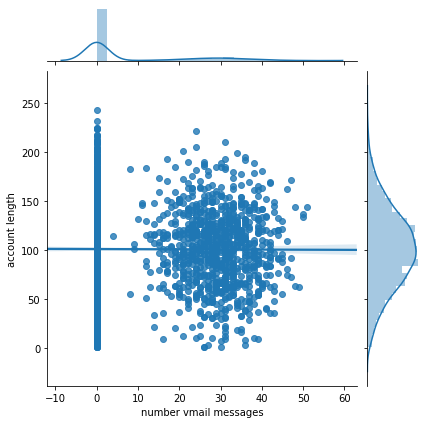

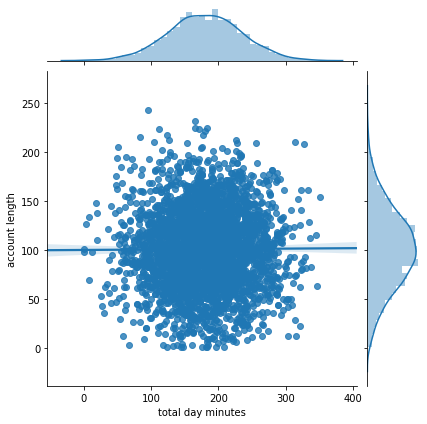

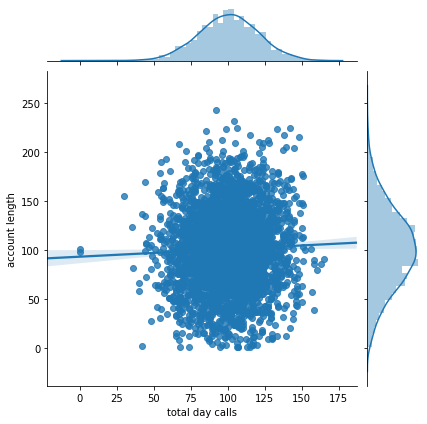

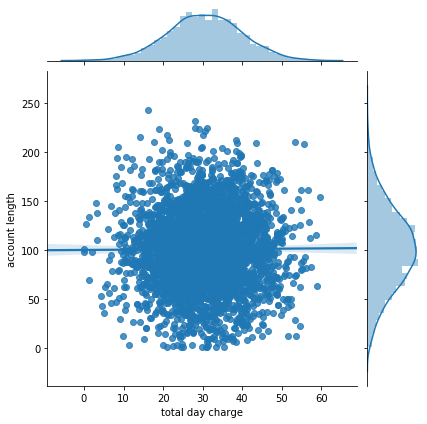

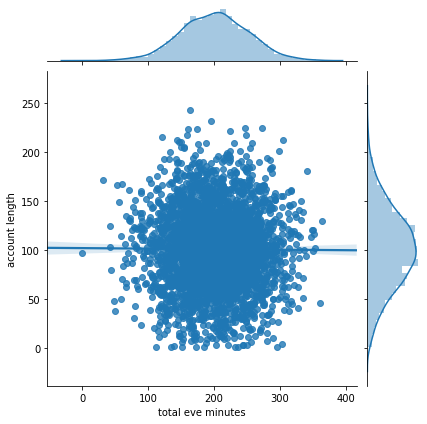

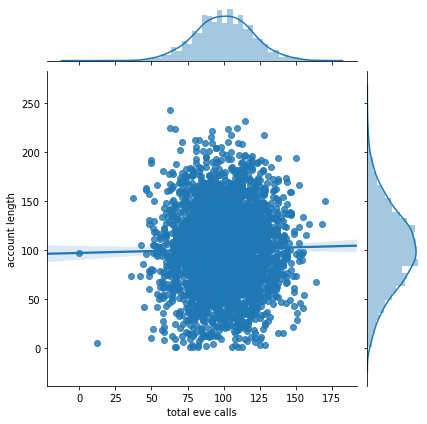

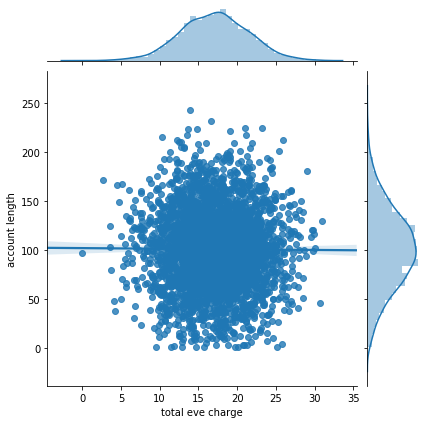

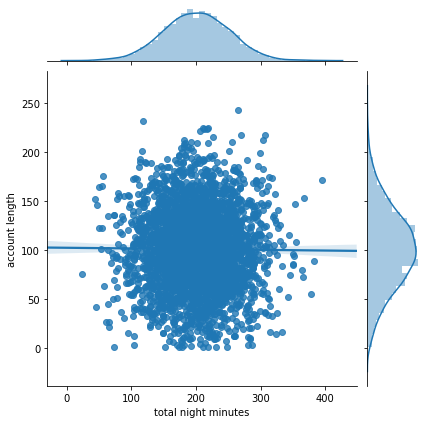

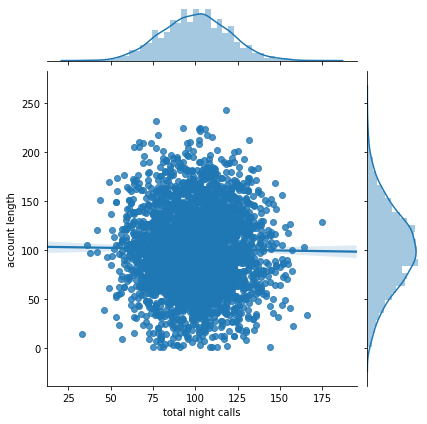

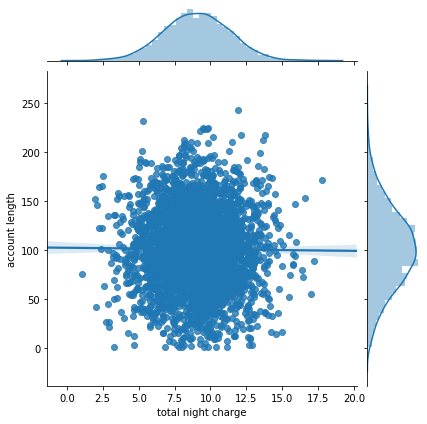

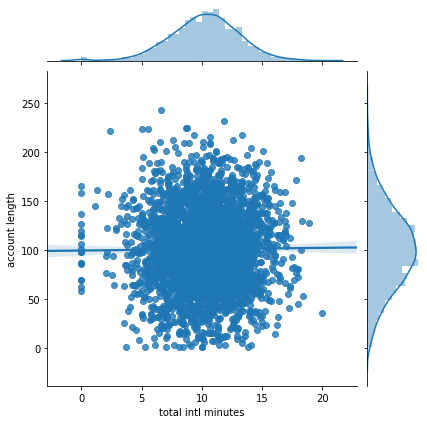

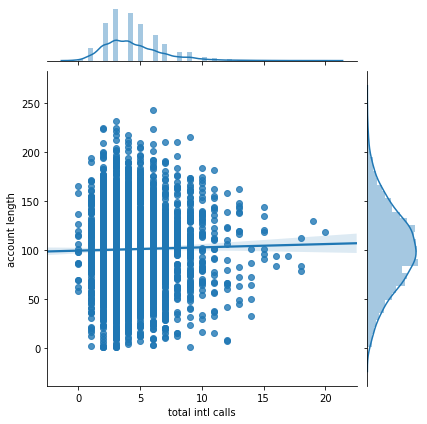

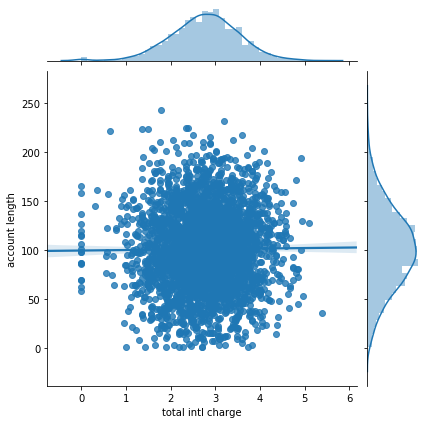

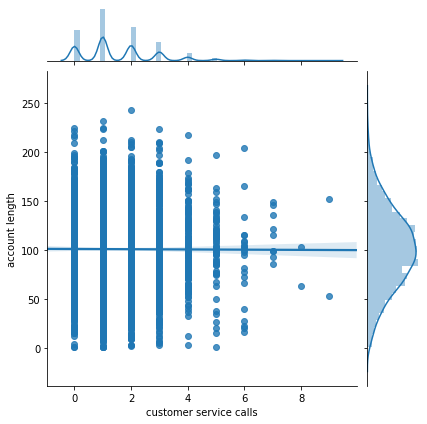

In [7]:
#jointplot with account length as proxy for churn
#fig,ax = plt. subplots()
fig = plt.figure(figsize=(14,4))
features = ['number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls',]
#for i in range(2):
    #for j in range(7):
    
for feature in features:
    ax = sns.jointplot(feature,'account length',data=df,kind='reg')
    plt.show()

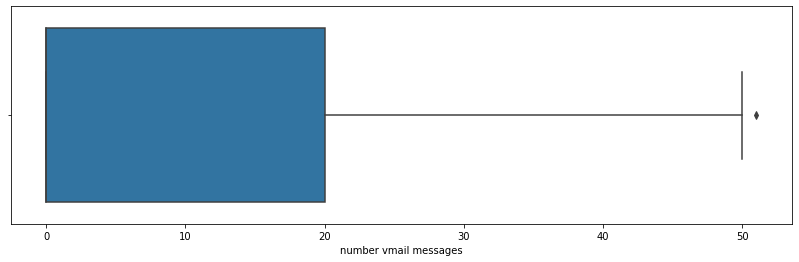

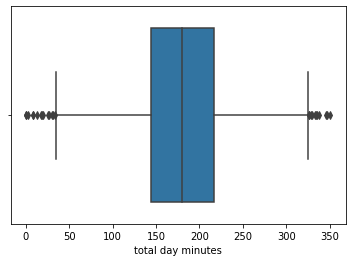

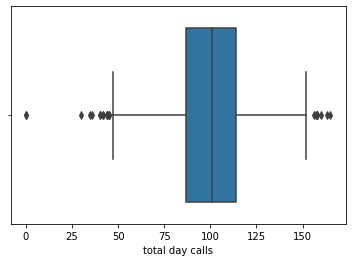

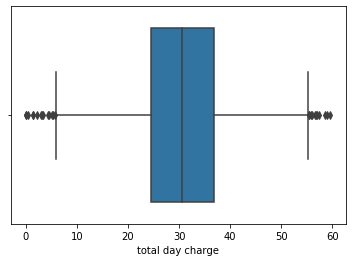

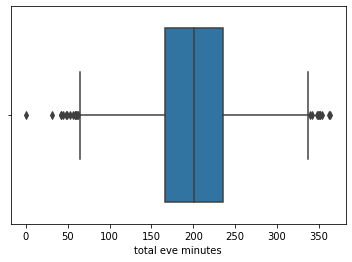

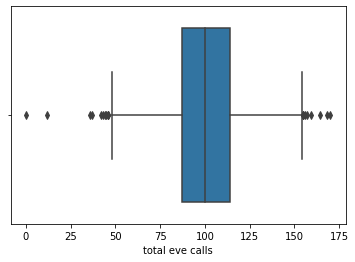

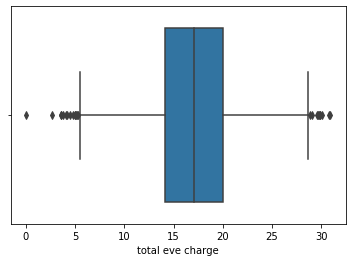

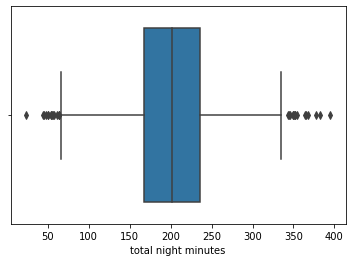

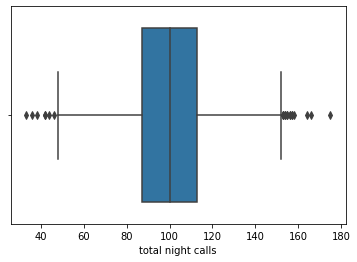

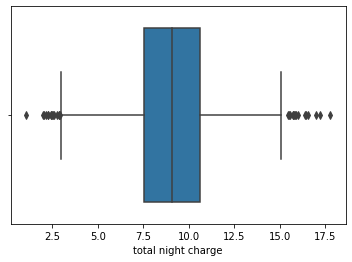

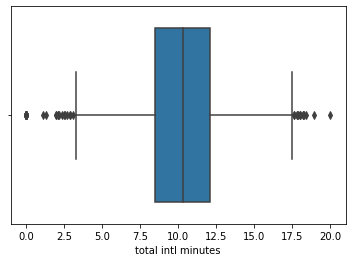

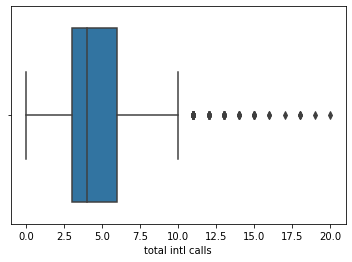

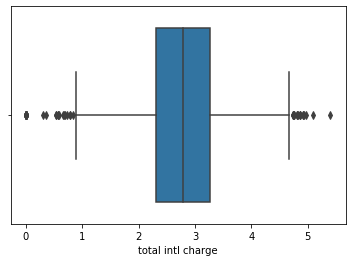

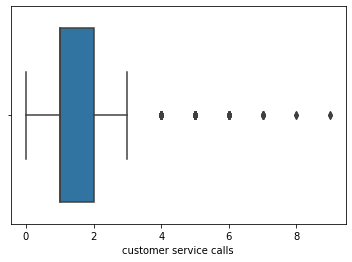

In [8]:
#boxplot with account length as proxy for churn
#fig,ax = plt. subplots()
fig = plt.figure(figsize=(14,4))
features = ['number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls',]
#for i in range(2):
    #for j in range(7):
   
for feature in features:
    ax = sns.boxplot(df[feature],data=df)
    plt.show()

The above visualizations do not show any significant relationships between the selected feature variables and proxy for churn, account length. Based on the human eye, the regression line did seem to be positively sloped for some of the daytime characteristics.

The phone number column can be excluded from the data set. However, when examing churn on a state-by-state basis, there is enough variance in these figures to suggest that state could be a feature variable that might be worth considering for inclusion in the model.

### Analysis of State Feature

In [9]:
#groupby method used to get churn numbers by state
df_state = df.groupby('state',axis=0).sum()
state_churn = df_state['churn']
states = df['state'].unique()
sorted_states = sorted(states)

In [10]:
#import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [11]:
#parameters for graph
data = dict(type='choropleth',
            colorscale = 'earth',
            locations = sorted_states,
            z = df_state['churn'],
            locationmode = 'USA-states',
            text = sorted_states,
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"Churn amount"}
            ) 

In [12]:
#paramenters for graph
layout = dict(title = 'Churn by State',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

In [13]:
choromap = go.Figure(data = [data],layout = layout)

In [14]:
fig = plt.figure(figsize=(20,10))
iplot(choromap)

<Figure size 1440x720 with 0 Axes>

Based on the choropleth map displayed above, the state feature variable is worth keeping in the final analysis.

## Data Preprocessing

### Addressing Categorical Variables

In [15]:
df_encode = df


category = [key for key in dict(df_encode.dtypes) if dict(df_encode.dtypes)[key] in ['bool','object']]

LE = LabelEncoder()
for i in category:
    LE.fit(df[i])
    df_encode[i] = LE.transform(df_encode[i])
df_encode.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,1926,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,1575,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1117,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1707,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,110,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### Outlier Treatment

In [16]:
#treatment of outliers based on boxplot visualization above
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(df_encode)
df_encode = transformer.transform(df_encode)
df_encode = pd.DataFrame(df_encode,columns = df.columns)
df_encode.head(5)
print(df_encode.shape)

(3333, 21)


### Assigning Variables

In [17]:
y = df_encode['churn']
X = df_encode.drop(['churn','account length'],axis=1)

For now, the states column will be left in the dataset and later feature selection measures will provide a statistically significant method for determining whether or not this explanatory variable will be included in the final model.

### Data Split for Cross-Validation

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,train_size=.8)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

### Feature Scaling

In [19]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = pd.DataFrame(X_train,columns = X.columns)
X_test = pd.DataFrame(X_test,columns= X.columns)

# Machine Learning Models

### XGBoost Classifier

In [20]:
# train the model

model = XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train,y_train,eval_metric=['error','logloss'],eval_set=eval_set)

[0]	validation_0-error:0.093398	validation_0-logloss:0.626806	validation_1-error:0.088456	validation_1-logloss:0.627095
[1]	validation_0-error:0.093023	validation_0-logloss:0.57195	validation_1-error:0.089955	validation_1-logloss:0.57246
[2]	validation_0-error:0.093023	validation_0-logloss:0.526667	validation_1-error:0.089955	validation_1-logloss:0.527873
[3]	validation_0-error:0.091898	validation_0-logloss:0.487181	validation_1-error:0.089955	validation_1-logloss:0.488441
[4]	validation_0-error:0.088522	validation_0-logloss:0.453813	validation_1-error:0.092954	validation_1-logloss:0.455146
[5]	validation_0-error:0.091898	validation_0-logloss:0.426044	validation_1-error:0.089955	validation_1-logloss:0.427949
[6]	validation_0-error:0.088522	validation_0-logloss:0.4014	validation_1-error:0.092954	validation_1-logloss:0.403403
[7]	validation_0-error:0.089272	validation_0-logloss:0.377717	validation_1-error:0.089955	validation_1-logloss:0.380551
[8]	validation_0-error:0.084021	validation_0

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[16]	validation_0-error:0.072018	validation_0-logloss:0.259001	validation_1-error:0.073463	validation_1-logloss:0.266868
[17]	validation_0-error:0.076519	validation_0-logloss:0.251305	validation_1-error:0.076462	validation_1-logloss:0.260466
[18]	validation_0-error:0.064516	validation_0-logloss:0.241299	validation_1-error:0.068966	validation_1-logloss:0.251506
[19]	validation_0-error:0.05964	validation_0-logloss:0.235801	validation_1-error:0.065967	validation_1-logloss:0.24628
[20]	validation_0-error:0.051388	validation_0-logloss:0.229027	validation_1-error:0.05997	validation_1-logloss:0.240441
[21]	validation_0-error:0.046887	validation_0-logloss:0.224538	validation_1-error:0.056972	validation_1-logloss:0.23688
[22]	validation_0-error:0.043886	validation_0-logloss:0.218865	validation_1-error:0.056972	validation_1-logloss:0.231887
[23]	validation_0-error:0.049512	validation_0-logloss:0.214969	validation_1-error:0.05997	validation_1-logloss:0.228698
[24]	validation_0-error:0.043136	vali

[84]	validation_0-error:0.033008	validation_0-logloss:0.142284	validation_1-error:0.055472	validation_1-logloss:0.191704
[85]	validation_0-error:0.032258	validation_0-logloss:0.141565	validation_1-error:0.053973	validation_1-logloss:0.191139
[86]	validation_0-error:0.032633	validation_0-logloss:0.141239	validation_1-error:0.053973	validation_1-logloss:0.191705
[87]	validation_0-error:0.032633	validation_0-logloss:0.141014	validation_1-error:0.053973	validation_1-logloss:0.191818
[88]	validation_0-error:0.032633	validation_0-logloss:0.140141	validation_1-error:0.053973	validation_1-logloss:0.191401
[89]	validation_0-error:0.031508	validation_0-logloss:0.139354	validation_1-error:0.055472	validation_1-logloss:0.190744
[90]	validation_0-error:0.031508	validation_0-logloss:0.138825	validation_1-error:0.055472	validation_1-logloss:0.190624
[91]	validation_0-error:0.030758	validation_0-logloss:0.138139	validation_1-error:0.055472	validation_1-logloss:0.190524
[92]	validation_0-error:0.031133

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [21]:
#predict
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print( "The model's accuracy is",accuracy)

The model's accuracy is 0.9445277361319341


In [22]:
from sklearn.metrics import classification_report
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n         0.0       0.99      0.95      0.97       589\n         1.0       0.71      0.90      0.79        78\n\n    accuracy                           0.94       667\n   macro avg       0.85      0.92      0.88       667\nweighted avg       0.95      0.94      0.95       667\n'

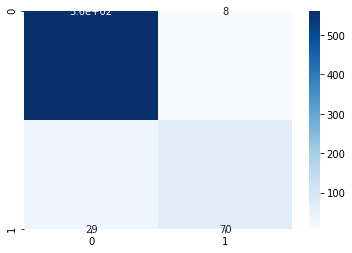

In [23]:
#confusion matrix
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)

sns.heatmap(cm, annot=True, 
             cmap='Blues')
#ax= plt.subplot()
#sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
#ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
#ax.set_title('Confusion Matrix'); 
#ax.xaxis.set_ticklabels(['business', 'health']); ax.yaxis.set_ticklabels(['health', 'business']);
#plt.tight_layout










#print('The Accuracy Score for this model is {acc}'.format(acc=acc))
#plt.ylabel('Actual label');
#plt.xlabel('Predicted label');
#all_sample_title = 'Accuracy Score: {0}'.format(acc)
#plt.title('Confusion Matrix', size = 7)
#plt.tight_layout()
#sns.set(font_scale=0.75)
#sns.heatmap(cm, annot=True, annot_kws={"size": 8}, fmt=".2g", linewidths=.2, square = True, robust = True); 
    

Accuracy: 94.45%


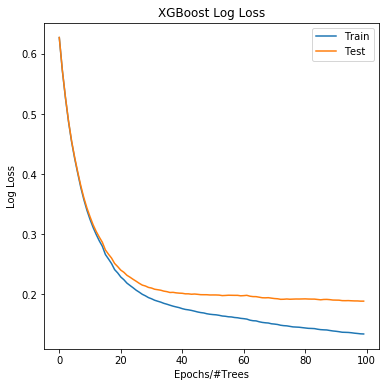

In [24]:
# make predictions for test data
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

from matplotlib import pyplot
# plot log loss
fig, ax = pyplot.subplots(figsize=(6,6))
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.xlabel('Epochs/#Trees')
pyplot.title('XGBoost Log Loss')
pyplot.show()

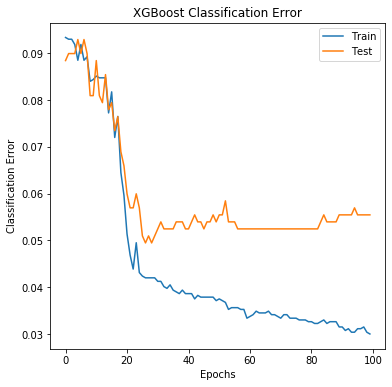

In [25]:
# plot classification error
fig, ax = pyplot.subplots(figsize=(6,6))
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.xlabel('Epochs')
pyplot.title('XGBoost Classification Error')
pyplot.show()

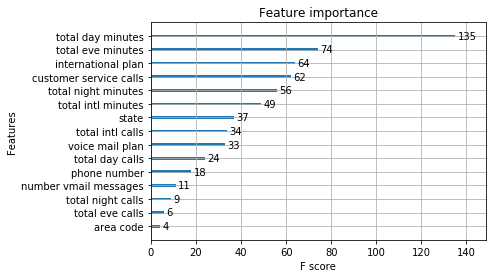

In [26]:
#feature importance
plot_importance(model,max_num_features=20)
plt.show()

Optimal Alpha Value: 0


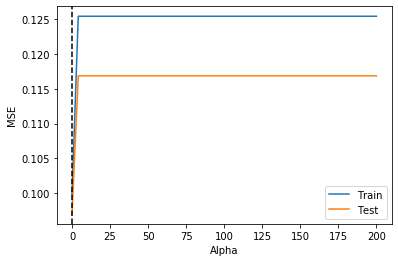

In [94]:
from regression import preprocess
from regression import optimal_alpha
optimal_alpha(X_train,y_train)

The Accuracy Score for this model is 0.9445277361319341


Text(0.5, 1, 'Confusion Matrix')

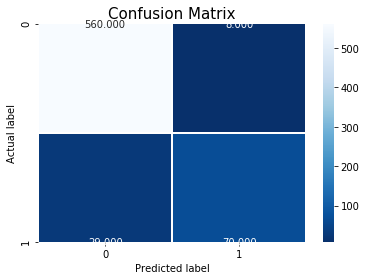

In [29]:
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
print('The Accuracy Score for this model is {acc}'.format(acc=acc))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = False, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
#plt.text(verticalalignment='center')
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title('Confusion Matrix', size = 15)

In [96]:
# Feature Selection with SelectFromModel

from sklearn.feature_selection import SelectFromModel
thresholds = sorted(model.feature_importances_)


output_dict = {}

for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=0.10, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    predictions = selection_model.predict(select_X_test)
    accuracy = accuracy_score(y_test, predictions)
    
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))
     

Thresh=0.000, n=4, Accuracy: 89.96%
Thresh=0.000, n=4, Accuracy: 89.96%
Thresh=0.000, n=4, Accuracy: 89.96%
Thresh=0.000, n=4, Accuracy: 89.96%
Thresh=0.009, n=4, Accuracy: 89.96%
Thresh=0.015, n=4, Accuracy: 89.96%
Thresh=0.017, n=4, Accuracy: 89.96%
Thresh=0.023, n=4, Accuracy: 89.96%
Thresh=0.023, n=4, Accuracy: 89.96%
Thresh=0.028, n=4, Accuracy: 89.96%
Thresh=0.032, n=4, Accuracy: 89.96%
Thresh=0.033, n=4, Accuracy: 89.96%
Thresh=0.073, n=4, Accuracy: 89.96%
Thresh=0.092, n=4, Accuracy: 89.96%
Thresh=0.096, n=4, Accuracy: 89.96%
Thresh=0.122, n=4, Accuracy: 89.96%
Thresh=0.122, n=4, Accuracy: 89.96%
Thresh=0.155, n=4, Accuracy: 89.96%
Thresh=0.161, n=4, Accuracy: 89.96%


In [98]:
results=pd.DataFrame()
results['columns']=X_train.columns
results['importances'] = model.feature_importances_
results.sort_values(by='importances',ascending=False,inplace=True)

results[:20]

,columns,importances
3,international plan,0.160876
18,customer service calls,0.154665
6,total day minutes,0.121735
4,voice mail plan,0.121650
9,total eve minutes,0.095890
16,total intl calls,0.092489
15,total intl minutes,0.072760
2,phone number,0.033036
12,total night minutes,0.032222
5,number vmail messages,0.027524


In [102]:
df_encode.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [107]:
#selecting top features based on importance
X_new = df_encode[['international plan','customer service calls','total day minutes','voice mail plan']]
y_new = df_encode['churn']

In [109]:
#data split
X_train_new,X_test_new,y_train_new,y_test_new = train_test_split(X_new,y_new)

In [116]:
# train the model

model_new = XGBClassifier()
eval_set = [(X_train_new, y_train_new), (X_test_new, y_test_new)]
model_new.fit(X_train_new,y_train_new,eval_metric=['error','logloss'],eval_set=eval_set)

[0]	validation_0-error:0.091637	validation_0-logloss:0.626302	validation_1-error:0.111511	validation_1-logloss:0.629595
[1]	validation_0-error:0.091637	validation_0-logloss:0.571579	validation_1-error:0.111511	validation_1-logloss:0.577774
[2]	validation_0-error:0.091637	validation_0-logloss:0.526137	validation_1-error:0.111511	validation_1-logloss:0.534634
[3]	validation_0-error:0.091637	validation_0-logloss:0.487309	validation_1-error:0.111511	validation_1-logloss:0.49834
[4]	validation_0-error:0.091637	validation_0-logloss:0.454406	validation_1-error:0.111511	validation_1-logloss:0.46775
[5]	validation_0-error:0.091637	validation_0-logloss:0.426298	validation_1-error:0.111511	validation_1-logloss:0.441257
[6]	validation_0-error:0.091637	validation_0-logloss:0.401705	validation_1-error:0.111511	validation_1-logloss:0.418393
[7]	validation_0-error:0.091637	validation_0-logloss:0.380443	validation_1-error:0.111511	validation_1-logloss:0.39829
[8]	validation_0-error:0.091637	validation_

[69]	validation_0-error:0.086435	validation_0-logloss:0.221737	validation_1-error:0.118705	validation_1-logloss:0.275767
[70]	validation_0-error:0.086435	validation_0-logloss:0.221294	validation_1-error:0.118705	validation_1-logloss:0.276073
[71]	validation_0-error:0.086435	validation_0-logloss:0.2212	validation_1-error:0.118705	validation_1-logloss:0.276132
[72]	validation_0-error:0.086435	validation_0-logloss:0.220885	validation_1-error:0.118705	validation_1-logloss:0.276062
[73]	validation_0-error:0.086034	validation_0-logloss:0.220589	validation_1-error:0.118705	validation_1-logloss:0.276193
[74]	validation_0-error:0.086034	validation_0-logloss:0.220266	validation_1-error:0.118705	validation_1-logloss:0.276459
[75]	validation_0-error:0.086034	validation_0-logloss:0.219673	validation_1-error:0.118705	validation_1-logloss:0.276678
[76]	validation_0-error:0.086034	validation_0-logloss:0.219589	validation_1-error:0.118705	validation_1-logloss:0.276734
[77]	validation_0-error:0.086034	v

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Accuracy: 87.65%


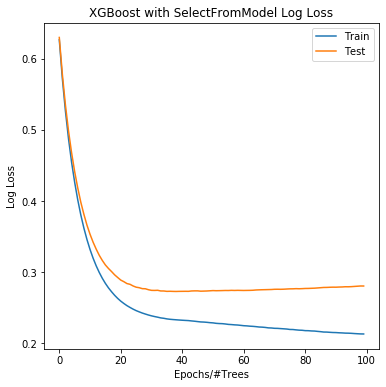

In [117]:
# make predictions for test data
y_pred_new = model.predict(X_test_new)
predictions = [round(value) for value in y_pred_new]

# evaluate predictions
accuracy = accuracy_score(y_test_new, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# retrieve performance metrics
results = model_new.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

from matplotlib import pyplot
# plot log loss
fig, ax = pyplot.subplots(figsize=(6,6))
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.xlabel('Epochs/#Trees')
pyplot.title('XGBoost with SelectFromModel Log Loss')
pyplot.show()

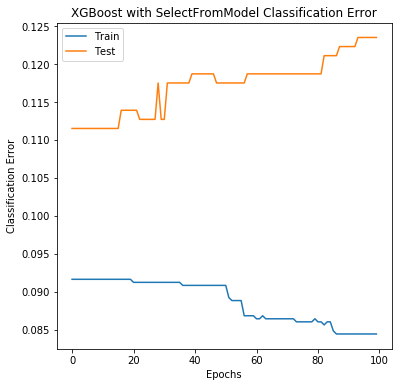

In [113]:
# plot classification error
fig, ax = pyplot.subplots(figsize=(6,6))
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.xlabel('Epochs')
pyplot.title('XGBoost with SelectFromModel Classification Error')
pyplot.show()

### XGB with Feature Selection

In [68]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb

In [32]:
# GridSearchCV with XGBoost model

xgb_model = model
param_grid = {'objective':['binary:logistic'],
              'learning_rate': [0.001,0.05,0.1, 10], 
              'max_depth': [2,3,4,5,6],
              'min_child_weight': [11],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [1000]}

grid = GridSearchCV(estimator = model, cv=5, param_grid = param_grid , scoring = 'roc_auc', verbose = 1, n_jobs = -1, refit=True)
grid.fit(X_train,y_train)

print("Best Score:" + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))

best_parameters = grid.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.5min finished


Best Score:0.9144558640944654
Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 2, 'min_child_weight': 11, 'n_estimators': 1000, 'objective': 'binary:logistic', 'subsample': 0.8}


In [86]:
#Feature Selection with RFECV
xgb_model = xgb.XGBClassifier(**best_parameters)
xgb_model.fit(X_train,y_train)
selector = RFECV(xgb_model, 200, cv= 5,scoring='accuracy')
selector.fit(X_train,y_train)

RFECV(cv=5,
      estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=0.7, gamma=0, learning_rate=0.05,
                              max_delta_step=0, max_depth=2,
                              min_child_weight=11, missing=None,
                              n_estimators=1000, n_jobs=1, nthread=None,
                              objective='binary:logistic', random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              seed=None, silent=None, subsample=0.8,
                              verbosity=1),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=200,
      verbose=0)

In [87]:
print('Optimal number of features: {}'.format(selector.n_features_))
selector.support_

Optimal number of features: 19


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [80]:
#Model performance
y_pred = selector.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
print(acc)

0.9310344827586207


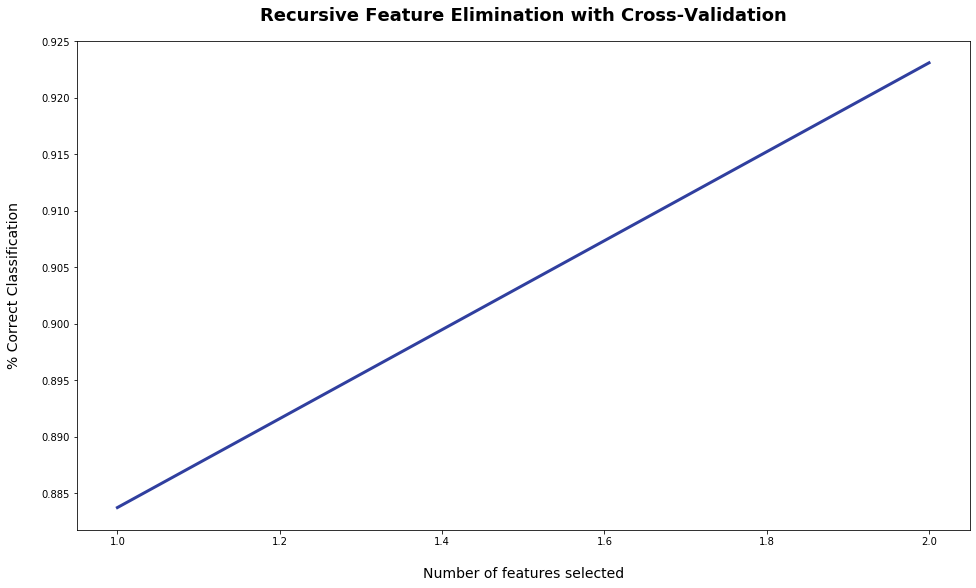

In [83]:
# visualization
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [ ]:
#predict
from sklearn.metrics import accuracy_score
y_pred4 = model4.predict(X_test4)
accuracy = accuracy_score(y_test4,y_pred4)
print( "The model's accuracy is",accuracy)

In [ ]:
#feature importance and coefficients
plot_importance(model4,max_num_features=20)
plt.show()

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 42,)
classifier.fit(X_train, y_train)

In [ ]:
y_predSVM = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_predSVM)
acc = accuracy_score(y_test,y_predSVM)
print('The Accuracy Score for this model is {acc}'.format(acc=acc))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title('Confusion Matrix', size = 15);


In [ ]:
from sklearn.linear_model import LogisticRegression
logclassifer = LogisticRegression()
logclassifer.fit(X_train,y_train)

In [ ]:
y_predlog = logclassifer.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_predlog)
acc = accuracy_score(y_test,y_predlog)
print('The Accuracy Score for this model is {acc}'.format(acc=acc))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title('Confusion Matrix', size = 15);


###Logistic Regression Classifiction Report


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predlog))

In [ ]:
logreg = [logclassifier.__class__,accuracy_score(y_test,y_predlog),roc_auc_score(y_test2,y_predSVC2)]
results = results.append([SVM_2])

###Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE
estimator = LogisticRegression()
selector = RFE(estimator,1,step=1)
selector = selector.fit(X_train,y_train)
print(selector.ranking_)
logclassifer.coef_

In [ ]:
y_predlogfeat = selector.predict(X_test)

###Model Performance with Feature Elimanation

In [ ]:
y_predfeature = selector.predict(X_test)
cm = confusion_matrix(y_test,y_predlogfeat)
acc = accuracy_score(y_test,y_predlogfeat)
print('The Accuracy Score for this model is {acc}'.format(acc=acc))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {acc}'.format(acc = acc)
plt.title('Confusion Matrix', size = 15);

###Logistic Regression with Feature Elimination Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predfeature))

### Visualization of Logistic Regression with Feature Selection

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Recommendation